In [101]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [102]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [103]:
df = pd.read_csv("../Python/Output/InversionNearOne.txt", sep='\t')
df.head()

,Input Uncertainty,Value,Uncertainty,Deviation,Mean,Minimum,Maximum,Less,More,-3.0,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.19998,1.046231,0.249940,-0.000013,-0.000013,-1.870628,13.062286,0,136,0.0,...,0.025446,0.018552,0.016727,0.009732,0.009834,0.007603,0.004562,0.003650,0.002940,0.000912
1,0.19997,1.046226,0.249911,0.007668,0.007668,-2.028132,9.552380,0,141,0.0,...,0.026980,0.018663,0.015417,0.012172,0.007303,0.007202,0.004666,0.004463,0.003753,0.002231
2,0.19996,1.046220,0.249881,-0.003157,-0.003157,-1.825532,14.963442,0,128,0.0,...,0.021171,0.020361,0.014688,0.010636,0.009724,0.006888,0.005065,0.005369,0.002836,0.002127
3,0.19995,1.046215,0.249851,0.006571,0.006571,-1.911184,14.259023,0,142,0.0,...,0.025867,0.019375,0.014100,0.012274,0.007912,0.008318,0.004666,0.003246,0.003652,0.000812
4,0.19994,1.046209,0.249822,0.004603,0.004603,-1.878345,12.684722,0,131,0.0,...,0.025129,0.020671,0.013781,0.011450,0.007194,0.007194,0.004762,0.003546,0.002837,0.002432


In [104]:
df.columns

Index(['Input Uncertainty', 'Value', 'Uncertainty', 'Deviation', 'Mean',
       'Minimum', 'Maximum', 'Less', 'More', '-3.0', '-2.8', '-2.6', '-2.4',
       '-2.2', '-2.0', '-1.8', '-1.6', '-1.4', '-1.2', '-1.0', '-0.8', '-0.6',
       '-0.4', '-0.2', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4',
       '1.6', '1.8', '2.0', '2.2', '2.4', '2.6', '2.8', '3.0'],
      dtype='object')

In [ ]:
df[df['Input Uncertainty']]

In [105]:
sHisto = [str(i/10) for i in range(-30, 31, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000608,0.005981,0.021391,0.040247,...,0.025446,0.018552,0.016727,0.009732,0.009834,0.007603,0.004562,0.003650,0.002940,0.000912
1,0.0,0.0,0.0,0.0,0.0,0.000101,0.000811,0.005376,0.019170,0.042195,...,0.026980,0.018663,0.015417,0.012172,0.007303,0.007202,0.004666,0.004463,0.003753,0.002231
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.001013,0.004964,0.020665,0.040215,...,0.021171,0.020361,0.014688,0.010636,0.009724,0.006888,0.005065,0.005369,0.002836,0.002127
3,0.0,0.0,0.0,0.0,0.0,0.000101,0.001319,0.004768,0.020187,0.042605,...,0.025867,0.019375,0.014100,0.012274,0.007912,0.008318,0.004666,0.003246,0.003652,0.000812
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.001419,0.006586,0.021988,0.040328,...,0.025129,0.020671,0.013781,0.011450,0.007194,0.007194,0.004762,0.003546,0.002837,0.002432


In [122]:
def PlotHisto(sInputUncertainty=(0.01,0.1,0.19998)):
    dfPlot = df[df['Input Uncertainty'].isin(sInputUncertainty)].set_index('Input Uncertainty')
    ax = dfPlot[sHisto].T.plot(grid=True, title=r'Histogram for $\frac{1}{1 \pm \delta x}$')
    ax.legend(bbox_to_anchor=(1.0, 1.0))   

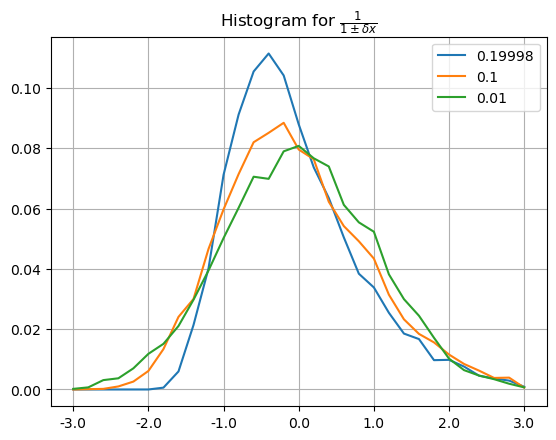

In [123]:
PlotHisto()

In [108]:
def PlotHisto(sInputUncertainty=(0.01, 0.1, 0.19, 0.199, 0.1999, 0.19998)):
    dfPlot = df[df['Input Uncertainty'].isin(sInputUncertainty)].set_index('Input Uncertainty')
    ax = dfPlot[sHisto].T.plot(grid=True, title=r'Histogram for $\frac{1}{1 \pm \delta x}$')
    ax.legend(bbox_to_anchor=(1.0, 1.0))   

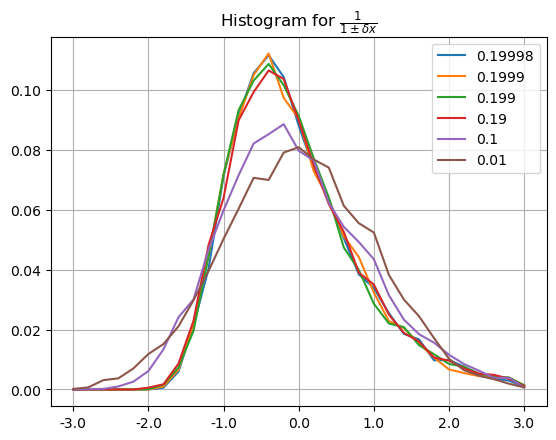

In [109]:
PlotHisto()

In [110]:
def PlotAll(sInputUncertainty=(0.01, 0.1, 0.19, 0.199, 0.1999, 0.19998) ):
    fig, ax = plt.subplots()
    ax.set_title(r' for $\frac{1}{1 \pm \delta x}$')
    ax.set_xlabel('Input Uncertainty')
    #ax.set_xscale('log')
    ax.set_ylabel('Value')
    #ax.set_yscale('log')
    plt.grid(True)

    ax.plot(df['Input Uncertainty'], df['Mean'], f'b--', label='Mean')
    ax.plot(df['Input Uncertainty'], df['Value'], f'g--', label='Value')
    
    ax2 = ax.twinx()
    ax2.set_ylabel('Uncertainty')
    ax2.plot(df['Input Uncertainty'], df['Deviation'], f'b-', label='Deviation')
    ax2.plot(df['Input Uncertainty'], df['Uncertainty'], f'g-', label='Uncertainty')


    ax.legend(bbox_to_anchor=(1.0, 1.0))

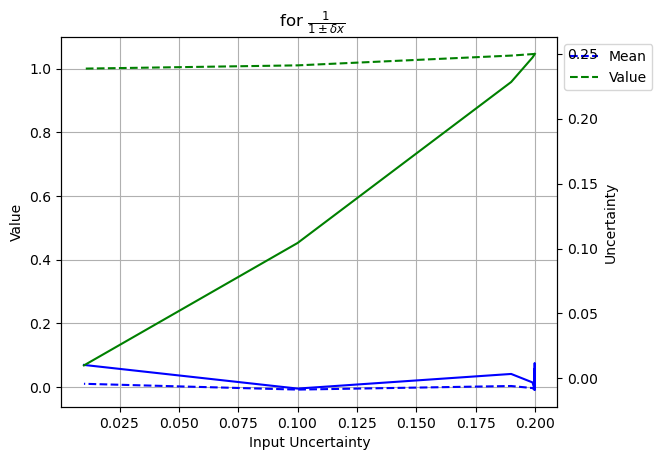

In [111]:
PlotAll()

KeyError: 'X'

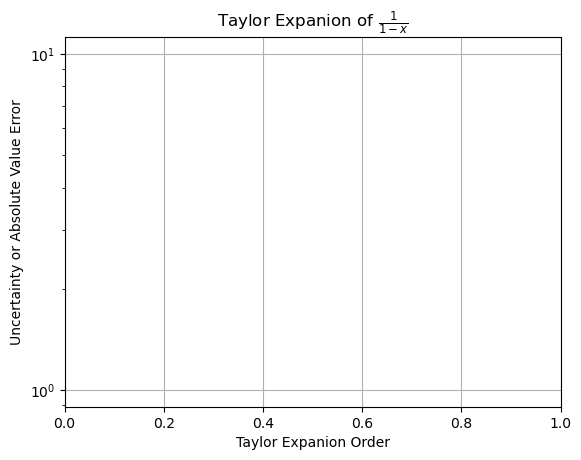

In [112]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,1e-2,'b'),(0.7,1e-2,'g'),(-0.6,1e-2,'c'),(-0.7,1e-2,'m')) )

In [ ]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,1e-1,'b'),(0.7,1e-1,'g'),(-0.6,1e-1,'c'),(-0.7,1e-1,'m')) )

In [ ]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,0,'b'),(0.7,0,'g'),(-0.6,0,'c'),(-0.7,0,'m')),
                     minOrder=60)

In [ ]:
dfPlot = df.sort_values('arc')

fig, ax = plt.subplots()
ax.set_title(f'Uncertainty of sin(x) and cos(x)')
ax.set_xlabel('arc')
ax.set_ylabel('Uncertainty')
ax.set_yscale('log')
plt.grid(True)
ax.plot(dfPlot['arc'], dfPlot['Sin Uncertainty'], label=f'Sin Uncertainty')
ax.plot(dfPlot['arc'], dfPlot['Cos Uncertainty'], label=f'Cos Uncertainty')
ax.plot(dfPlot['arc'], dfPlot['Error Uncertainty'], label=f'Error Uncertainty')
ax.legend(bbox_to_anchor=(1.0, 1.0))

#ax2 = ax.twinx()
#ax2.set_ylabel('Error')
#ax2.plot(dfPlot['arc'], dfPlot['Normalized Error'], label=f'Normalized Error')
#ax.legend(bbox_to_anchor=(1.0, 0.8))

In [ ]:
fig, ax = plt.subplots()
ax.set_title(f'Regressive Caclulation of sin(x) and cos(x)')
ax.set_xlabel('Order')
ax.set_xticks(range(0, 18, 2))
ax.set_ylabel('Error Deviation')
plt.grid(True)

dfMean = df[['Order', 'Normalized Error']].groupby('Order').mean()
dfDev = df[['Order', 'Normalized Error']].groupby('Order').std()
ax.plot(dfDev.index, dfMean['Normalized Error'], 'b:', label=f'Regression Normalized Error Mean')
ax.plot(dfDev.index, dfDev['Normalized Error'], 'b-', label=f'Regression Normalized Error Deviation')

ax2 = ax.twinx()
ax2.set_ylabel('Value Error')
dfMean = df[['Order', 'Error Value']].groupby('Order').mean()
dfDev = df[['Order', 'Error Value']].groupby('Order').std()
ax2.plot(dfMean.index, dfMean['Error Value'], f'c:', label=f'Regression Value Error Mean')
ax2.plot(dfDev.index, dfDev['Error Value'], f'c--', label=f'Regression Value Error Deviation')

dfMean = df[['Order', 'lib error']].groupby('Order').mean()
dfDev = df[['Order', 'lib error']].groupby('Order').std()
ax2.plot(dfMean.index, dfMean['lib error'], f'm:', label=f'Library Value Error Mean')
ax2.plot(dfDev.index, dfDev['lib error'], f'm--', label=f'Library Value Error Deviation')

ax.legend(bbox_to_anchor=(1.68, 0.86))
ax2.legend(bbox_to_anchor=(1.6, 0.3))

In [ ]:
fig, ax = plt.subplots()
ax.set_title(f'Regressive Caclulation of sin(x) and cos(x)')
ax.set_xlabel('Order')
ax.set_xticks(range(0, 18, 2))
ax.set_ylabel('Error Deviation')
plt.grid(True)

dfDev = df[['Order', 'Normalized Error']].groupby('Order').std()
ax.plot(dfDev.index, dfDev['Normalized Error'], 'g-', label=f'Error Deviation')

ax2 = ax.twinx()
ax2.set_ylabel('Uncertainty')
ax2.set_yscale('log')
for column, color in zip(('Sin Uncertainty', 'Cos Uncertainty'), ('c', 'm')):
    dfMean = df[['Order', column]].groupby('Order').mean()
    dfDev = df[['Order', column]].groupby('Order').std()
    ax2.plot(dfMean.index, dfMean[column], f'{color}--', label=f'{column} Mean')
    ax2.plot(dfDev.index, dfDev[column], f'{color}:', label=f'{column} Deviation')

ax.legend(bbox_to_anchor=(1.5, 0.8))
ax2.legend(bbox_to_anchor=(1.6, 0.3))